# MBA em Ciência de Dados
### Universidade de São Paulo, São Carlos, Brasil

**Disciplina:** Aprendizado de Máquina

**Professor Reponsavel:** Prof. Dr. André Carlos Ponce de Leon Ferreira de Carvalho
📧 andre@icmc.usp.br
🌐 [linkedin](https://www.linkedin.com/in/andr%C3%A9-carlos-ponce-de-leon-f-de-carvalho-151bb26/)
🔗 [site](http://www.cemeai.icmc.usp.br/component/teamdisplay/108)

# Prática: Tarefas de Aprendizado de Máquina

**Autor:** Edesio Alcobaça
📧 edesio@usp.br
🌐 [linkedin](https://www.linkedin.com/in/ealcobaca/)
🔗 [site](https://ealcobaca.github.io/)

## Imports


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_blobs, make_regression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.contrib.classifier import DecisionViz
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError

# plt.rcParams["figure.figsize"] = (10,10)
np.set_printoptions(suppress=True)

## Tarefas de AM

Existem diversos tipos de Tarefas de Aprendizado de Máquina. A figura a seguir demonstra os mais importantes:

<img src="https://pbs.twimg.com/media/FAnhroQXEAIb89a.png:large">

Dentre as mais importantes destacamos a classificação, a regressão e a clusterização.



Entender qual a tarefa mais adequada para um problema é uma das tarefas do Cientista de Dados.



## Aprendizado Supervisionado

É a tarefa que aprende uma função que mapeia uma entrada a uma saída por meio de pares de exemplos de entrada e saída.

### Classificação
Na classificação a saída é discreta, por exemplo:

* Se vai chover ou fazer sol;
* Se o diagnóstico para uma doença é positivo ou negativo;
* Se houve ou não fraude em uma dada transferência bancária;
* Se o cliente vai preferir o produto A, B ou C.

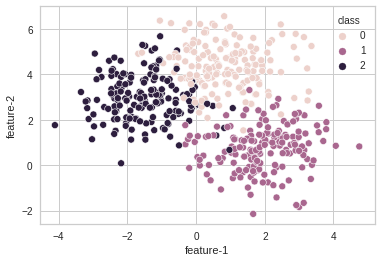

In [ ]:
X, y = make_blobs(n_samples=500, n_features=2, centers=3, random_state=0)

df = pd.DataFrame(
    {
        'feature-1': X[:, 0],
        'feature-2': X[:, 1],
        'target': y
    }
)

features = ["feature-1", "feature-2"]
target = "target"

sns.scatterplot(data=df, x=features[0], y=features[1], hue=target)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

list(map(lambda x: x.shape, [X_train, X_test, y_train, y_test]))

[(350, 2), (150, 2), (350,), (150,)]

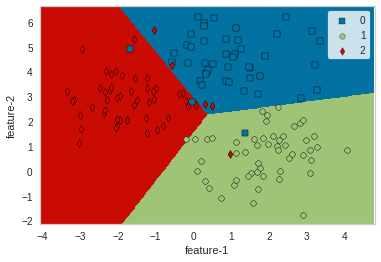

In [ ]:
clf = LogisticRegression(random_state=42)

viz = DecisionViz(
    clf,
    title="Decision Tree",
    features=features
)

viz.fit(X_train, y_train)
viz.draw(X_test, y_test)
viz.show()

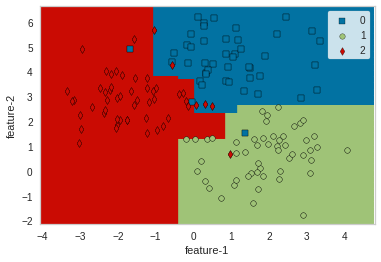

In [ ]:
clf =  DecisionTreeClassifier(
    criterion="entropy",
    max_depth=5,
    min_samples_split=10,
    random_state=42
    )

viz = DecisionViz(
    clf,
    title="Decision Tree",
    features=features
)

viz.fit(X_train, y_train)
viz.draw(X_test, y_test)
viz.show()

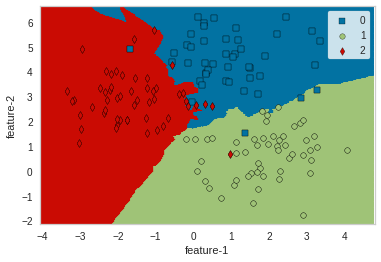

In [ ]:
clf = KNeighborsClassifier(
    n_neighbors=5,
    metric="euclidean"
    )

viz = DecisionViz(
    clf,
    title="Nearest Neighbors",
    features=features
)

viz.fit(X_train, y_train)
viz.draw(X_test, y_test)
viz.show()

### Regressão
Na regressão a saída é contínua, por exemplo:

* O valor de uma ação na semana seguinte;
* A temperatura do dia seguinte;
* A quantidade de produtos vendidos em uma campanha;
* O preço de um insumo nos próximos meses.

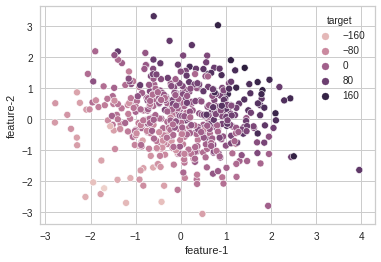

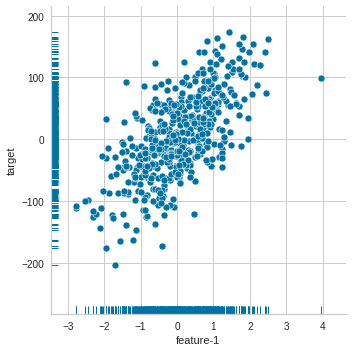

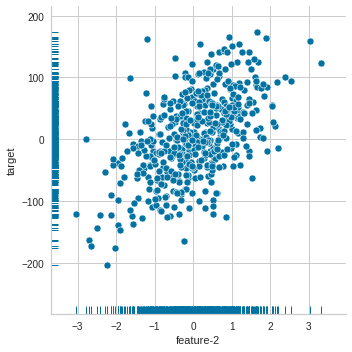

In [ ]:
X, y = make_regression(
    n_samples=500,
    n_features=2,
    n_informative=2,
    noise=30,
    random_state=1
    )

df = pd.DataFrame(
    {
        'feature-1': X[:, 0],
        'feature-2': X[:, 1],
        'target': y
    }
)

features = ["feature-1", "feature-2"]
target = "target"

sns.scatterplot(data=df, x=features[0], y=features[1], hue=target)

sns.relplot(data=df, x=features[0], y=target)
sns.rugplot(data=df, x=features[0], y=target)

sns.relplot(data=df, x=features[1], y=target)
sns.rugplot(data=df, x=features[1], y=target)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

list(map(lambda x: x.shape, [X_train, X_test, y_train, y_test]))

[(350, 2), (150, 2), (350,), (150,)]

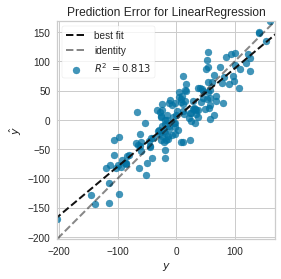

In [ ]:
model =  LinearRegression()

visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

## Aprendizado Não-Supervisionado
Nenhum rótulo é previamente conhecido, desta maneira os dados de entrada são usados para descobrir padrões ocultos e agregá-los de alguma forma.

### Agrupamento 

Exemplo:
* Segmentação de clientes
* Motor de recomendação
* Social Network Analysis (SNA)

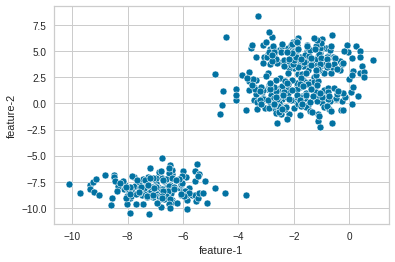

In [ ]:
X, _ = make_blobs(n_samples=500, n_features=4, centers=3, random_state=1)

df = pd.DataFrame(
    {
        'feature-1': X[:, 0],
        'feature-2': X[:, 1],
    }
)

features = ["feature-1", "feature-2"]
target = "target"

sns.scatterplot(data=df, x=features[0], y=features[1])
plt.show()

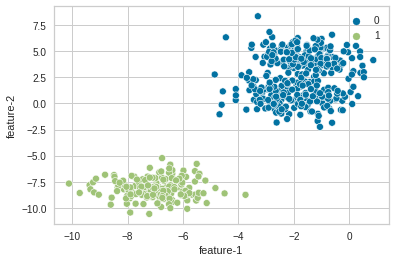

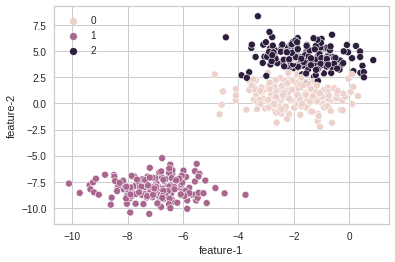

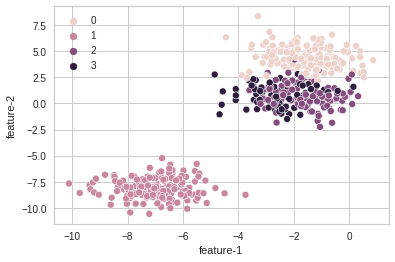

In [ ]:
for c in [2, 3, 4]:
  cluster = AgglomerativeClustering(n_clusters=c, affinity='euclidean', linkage='ward')
  y_ = cluster.fit_predict(X)
  sns.scatterplot(data=df, x=features[0], y=features[1], hue = y_)
  plt.show()

<font size="1"> © <a href="https://github.com/ealcobaca">ealcobaca</a> *(2022)* </font>